In [1]:
from google.colab import files
upload = files.upload()

Saving data1.xls to data1.xls


In [119]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.python.keras.utils.data_utils import Sequence
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [120]:
import io
import numpy as np

In [121]:
#LOAD_TO_PREDICT = "C4"
FREQ = "1H" # frequency of the time series
c_data= pd.read_excel(io.BytesIO(upload['data1.xls']))

df_copy=c_data.copy()

In [122]:
c_data=c_data.set_index('Timestamp') # to query fast and help in subset and filtering fast

In [123]:
c_data['Values (Gbps)']=c_data['Values (Gbps)'].fillna(method='bfill')

In [124]:
df_copy=c_data.copy()
df_copy=df_copy.reset_index()
c_data.head(6)

,Values (Gbps)
Timestamp,
2019-11-04 00:00:00,10.47
2019-11-04 01:00:00,6.99
2019-11-04 02:00:00,4.63
2019-11-04 03:00:00,3.17
2019-11-04 04:00:00,0.41
2019-11-04 05:00:00,3.73


In [125]:
t_target = c_data["Values (Gbps)"]
t_target

Timestamp
2019-11-04 00:00:00    10.47
2019-11-04 01:00:00     6.99
2019-11-04 02:00:00     4.63
2019-11-04 03:00:00     3.17
2019-11-04 04:00:00     0.41
                       ...  
2020-01-03 19:00:00    13.51
2020-01-03 20:00:00    15.07
2020-01-03 21:00:00    15.56
2020-01-03 22:00:00    15.90
2020-01-03 23:00:00    14.37
Name: Values (Gbps), Length: 1464, dtype: float64

In [126]:
def create_ts_features(data):
    
    def get_usage(row):
         #Usage time in quator wise of 6 hours
    
        if 0 <= row.hour <= 6:
            return 1
        elif 7 <= row.hour <= 12:
            return 2
        elif 13 <= row.hour <= 18:
            return 3
        else:
            return 4
    
    features = pd.DataFrame()
    
    features["hour"] = data.index.hour
    features["weekday"] = data.index.weekday
    features["dayofyear"] = data.index.dayofyear
    features["is_weekend"] = data.index.weekday.isin([5, 6]).astype(np.int32)
    features["weekofyear"] = data.index.weekofyear
    features["month"] = data.index.month
    features["usage"] = pd.Series(data.index.map(get_usage))
    
    features.index = data.index
        
    return features

ts = create_ts_features(t_target)
features = ts.join(t_target, how="outer")
target = t_target[t_target.index >= features.index[0]]
features.head(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,hour,weekday,dayofyear,is_weekend,weekofyear,month,usage,Values (Gbps)
Timestamp,,,,,,,,
2019-11-04 00:00:00,0,0,308,0,45,11,1,10.47
2019-11-04 01:00:00,1,0,308,0,45,11,1,6.99
2019-11-04 02:00:00,2,0,308,0,45,11,1,4.63
2019-11-04 03:00:00,3,0,308,0,45,11,1,3.17
2019-11-04 04:00:00,4,0,308,0,45,11,1,0.41
2019-11-04 05:00:00,5,0,308,0,45,11,1,3.73


In [127]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.python.keras.utils.data_utils import Sequence
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [128]:
features

,hour,weekday,dayofyear,is_weekend,weekofyear,month,usage,Values (Gbps)
Timestamp,,,,,,,,
2019-11-04 00:00:00,0,0,308,0,45,11,1,10.47
2019-11-04 01:00:00,1,0,308,0,45,11,1,6.99
2019-11-04 02:00:00,2,0,308,0,45,11,1,4.63
2019-11-04 03:00:00,3,0,308,0,45,11,1,3.17
2019-11-04 04:00:00,4,0,308,0,45,11,1,0.41
...,...,...,...,...,...,...,...,...
2020-01-03 19:00:00,19,4,3,0,1,1,4,13.51
2020-01-03 20:00:00,20,4,3,0,1,1,4,15.07
2020-01-03 21:00:00,21,4,3,0,1,1,4,15.56


In [129]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(features)

In [130]:
data_scaled

array([[0.        , 0.        , 0.84340659, ..., 0.90909091, 0.        ,
        0.40597256],
       [0.04347826, 0.        , 0.84340659, ..., 0.90909091, 0.        ,
        0.26553672],
       [0.08695652, 0.        , 0.84340659, ..., 0.90909091, 0.        ,
        0.17029863],
       ...,
       [0.91304348, 0.66666667, 0.00549451, ..., 0.        , 1.        ,
        0.61138015],
       [0.95652174, 0.66666667, 0.00549451, ..., 0.        , 1.        ,
        0.62510089],
       [1.        , 0.66666667, 0.00549451, ..., 0.        , 1.        ,
        0.56335755]])

In [131]:
data_scaled.shape

(1464, 8)

In [132]:
feature=data_scaled
target=data_scaled[:,7]

In [133]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [134]:
TimeseriesGenerator(feature, target, length=2, sampling_rate=1, batch_size=1)[0]


(array([[[0.        , 0.        , 0.84340659, 0.        , 0.8627451 ,
          0.90909091, 0.        , 0.40597256],
         [0.04347826, 0.        , 0.84340659, 0.        , 0.8627451 ,
          0.90909091, 0.        , 0.26553672]]]), array([0.17029863]))

In [206]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.10, random_state=123, shuffle = False)


In [307]:
win_length=4
batch_size=32
num_features=8
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [308]:
train_generator[0]


(array([[[0.        , 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.40597256],
         [0.04347826, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.26553672],
         [0.08695652, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.17029863],
         [0.13043478, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.11138015]],
 
        [[0.04347826, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.26553672],
         [0.08695652, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.17029863],
         [0.13043478, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.11138015],
         [0.17391304, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.        ]],
 
        [[0.08695652, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.17029863],
         [0.13043478, 0.        , 0.84340659, ..., 0.90909091,
          0.        , 0.11138015],
         [0.17

In [309]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [310]:
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 4, 128)            70144     
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 4, 128)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 4, 128)            131584    
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 4, 128)            0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 4, 128)            0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)              

In [311]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2
                                                    )

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=30,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


42/42 [==============================] - 6s 43ms/step - loss: 0.0712 - mean_absolute_error: 0.2135 - val_loss: 0.0318 - val_mean_absolute_error: 0.1511
Epoch 2/30
42/42 [==============================] - 1s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.1295 - val_loss: 0.0219 - val_mean_absolute_error: 0.1263
Epoch 3/30
42/42 [==============================] - 1s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.1178 - val_loss: 0.0187 - val_mean_absolute_error: 0.1132
Epoch 4/30
42/42 [==============================] - 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0912 - val_loss: 0.0111 - val_mean_absolute_error: 0.0810
Epoch 5/30
42/42 [==============================] - 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0776 - val_loss: 0.0167 - val_mean_absolute_error: 0.1002
Epoch 6/30
42/42 [==============================] - 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0684 - val_loss: 0.0156 - val_mean_absolute_error: 0.0949


In [312]:
model.evaluate_generator(test_generator, verbose=0)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.015582487918436527, 0.09491660445928574]

In [313]:
predictions=model.predict_generator(test_generator)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [314]:
predictions.shape[0]

143

In [315]:
predictions

array([[0.3879087 ],
       [0.2324592 ],
       [0.15337008],
       [0.09601511],
       [0.11114103],
       [0.13232173],
       [0.15988825],
       [0.23442395],
       [0.32107583],
       [0.3843923 ],
       [0.41546127],
       [0.44450334],
       [0.46512535],
       [0.5029363 ],
       [0.52718717],
       [0.5326889 ],
       [0.526185  ],
       [0.536852  ],
       [0.5463857 ],
       [0.5746022 ],
       [0.5897239 ],
       [0.58889675],
       [0.59469634],
       [0.5883266 ],
       [0.39564267],
       [0.2442451 ],
       [0.19148038],
       [0.13814273],
       [0.14969075],
       [0.1655203 ],
       [0.1856398 ],
       [0.23345089],
       [0.28256765],
       [0.3142757 ],
       [0.32862532],
       [0.34536058],
       [0.35939455],
       [0.38725686],
       [0.40858105],
       [0.4156172 ],
       [0.41211373],
       [0.42182368],
       [0.4315596 ],
       [0.4536285 ],
       [0.46867922],
       [0.4707211 ],
       [0.46387234],
       [0.470

In [316]:
y_test

array([0.57667474, 0.56981437, 0.55246166, 0.50121065, 0.39911219,
       0.2905569 , 0.19895077, 0.13438257, 0.09200969, 0.07909605,
       0.09644875, 0.1598063 , 0.27683616, 0.3700565 , 0.42453592,
       0.46489104, 0.49273608, 0.51049233, 0.52138822, 0.53753027,
       0.55851493, 0.56053269, 0.55326877, 0.56981437, 0.58797417,
       0.99677159, 0.56900726, 0.50443906, 0.39346247, 0.27764326,
       0.18886199, 0.12631154, 0.08837772, 0.08757062, 0.12792575,
       0.19935432, 0.29782082, 0.3708636 , 0.41525424, 0.44753834,
       0.47215496, 0.47659403, 0.48385795, 0.49959645, 0.51291364,
       0.53874092, 0.53874092, 0.55528652, 0.57304278, 0.58999193,
       0.56497175, 0.51008878, 0.39467312, 0.27885391, 0.18038741,
       0.12066182, 0.08474576, 0.08676352, 0.12308313, 0.19774011,
       0.29620662, 0.36682809, 0.41525424, 0.44108152, 0.45762712,
       0.47659403, 0.48385795, 0.48950767, 0.49757869, 0.49394673,
       0.48466505, 0.64608555, 0.65294592, 0.64891041, 0.47457

In [317]:
x_test[:,:7][win_length:]


array([[0.04347826, 1.        , 0.99450549, ..., 1.        , 1.        ,
        0.        ],
       [0.08695652, 1.        , 0.99450549, ..., 1.        , 1.        ,
        0.        ],
       [0.13043478, 1.        , 0.99450549, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.91304348, 0.66666667, 0.00549451, ..., 0.        , 0.        ,
        1.        ],
       [0.95652174, 0.66666667, 0.00549451, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.66666667, 0.00549451, ..., 0.        , 0.        ,
        1.        ]])

In [318]:
df_pred=pd.concat([ pd.DataFrame(x_test[:,:7][win_length:]),pd.DataFrame(predictions)],axis=1)
df_pred

,0,1,2,3,4,5,6,0
0,0.043478,1.000000,0.994505,1.0,1.0,1.0,0.0,0.387909
1,0.086957,1.000000,0.994505,1.0,1.0,1.0,0.0,0.232459
2,0.130435,1.000000,0.994505,1.0,1.0,1.0,0.0,0.153370
3,0.173913,1.000000,0.994505,1.0,1.0,1.0,0.0,0.096015
4,0.217391,1.000000,0.994505,1.0,1.0,1.0,0.0,0.111141
...,...,...,...,...,...,...,...,...
138,0.826087,0.666667,0.005495,0.0,0.0,0.0,1.0,0.368477
139,0.869565,0.666667,0.005495,0.0,0.0,0.0,1.0,0.385405
140,0.913043,0.666667,0.005495,0.0,0.0,0.0,1.0,0.399711
141,0.956522,0.666667,0.005495,0.0,0.0,0.0,1.0,0.403766


In [319]:
rev_trans=scaler.inverse_transform(df_pred)


In [320]:
rev_trans

array([[  1.        ,   6.        , 363.        , ...,  12.        ,
          1.        ,  10.02237751],
       [  2.        ,   6.        , 363.        , ...,  12.        ,
          1.        ,   6.17033904],
       [  3.        ,   6.        , 363.        , ...,  12.        ,
          1.        ,   4.21051064],
       ...,
       [ 21.        ,   4.        ,   3.        , ...,   1.        ,
          4.        ,  10.31484776],
       [ 22.        ,   4.        ,   3.        , ...,   1.        ,
          4.        ,  10.41532902],
       [ 23.        ,   4.        ,   3.        , ...,   1.        ,
          4.        ,  10.28257007]])

In [321]:
df_final=features[predictions.shape[0]*-1:]
df_final

,hour,weekday,dayofyear,is_weekend,weekofyear,month,usage,Values (Gbps)
Timestamp,,,,,,,,
2019-12-29 01:00:00,1,6,363,1,52,12,1,10.30
2019-12-29 02:00:00,2,6,363,1,52,12,1,7.61
2019-12-29 03:00:00,3,6,363,1,52,12,1,5.34
2019-12-29 04:00:00,4,6,363,1,52,12,1,3.74
2019-12-29 05:00:00,5,6,363,1,52,12,1,2.69
...,...,...,...,...,...,...,...,...
2020-01-03 19:00:00,19,4,3,0,1,1,4,13.51
2020-01-03 20:00:00,20,4,3,0,1,1,4,15.07
2020-01-03 21:00:00,21,4,3,0,1,1,4,15.56


In [322]:
df_final['App_Pred'] = rev_trans[:,7]

df_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hour,weekday,dayofyear,is_weekend,weekofyear,month,usage,Values (Gbps),App_Pred
Timestamp,,,,,,,,,
2019-12-29 01:00:00,1,6,363,1,52,12,1,10.30,10.022378
2019-12-29 02:00:00,2,6,363,1,52,12,1,7.61,6.170339
2019-12-29 03:00:00,3,6,363,1,52,12,1,5.34,4.210511
2019-12-29 04:00:00,4,6,363,1,52,12,1,3.74,2.789254
2019-12-29 05:00:00,5,6,363,1,52,12,1,2.69,3.164075
...,...,...,...,...,...,...,...,...,...
2020-01-03 19:00:00,19,4,3,0,1,1,4,13.51,9.540855
2020-01-03 20:00:00,20,4,3,0,1,1,4,15.07,9.960337
2020-01-03 21:00:00,21,4,3,0,1,1,4,15.56,10.314848


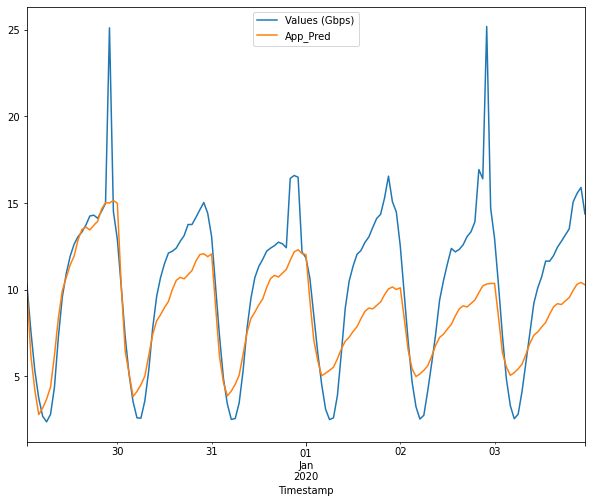

In [323]:
df_final[['Values (Gbps)','App_Pred']].plot()
